In [1]:
import os
import numpy as np
import pickle
import pandas as pd

In [2]:
root = os.getcwd()
root

'./fair_taucc/datasets/movielens/movielens-1m'

In [3]:
matrix = np.load(root + "/matrix.npy").astype(int)
Sx = np.load(root + "/gender.npy").astype(int)
genres = np.load(root + "/genres.npy").astype(int)

In [4]:
genres

array([4, 1, 4, ..., 7, 7, 7])

In [5]:
matrix.shape

(6040, 3706)

In [6]:
np.unique(Sx, return_counts=True)

(array([0, 1]), array([4331, 1709]))

In [7]:
unique_genres = np.unique(genres)
unique_genres

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [8]:
dict_genres = {
    'Action': 0,
    'Adventure': 1,
    'Animation': 2,
    "Children's": 3,
    'Comedy': 4,
    'Crime': 5,
    'Documentary': 6,
    'Drama': 7,
    'Fantasy': 8,
    'Film-Noir': 9,
    'Horror': 10,
    'Musical': 11,
    'Mystery': 12,
    'Romance': 13,
    'Sci-Fi': 14,
    'Thriller': 15,
    'War': 16,
    'Western': 17
}

In [9]:
dict_genres

{'Action': 0,
 'Adventure': 1,
 'Animation': 2,
 "Children's": 3,
 'Comedy': 4,
 'Crime': 5,
 'Documentary': 6,
 'Drama': 7,
 'Fantasy': 8,
 'Film-Noir': 9,
 'Horror': 10,
 'Musical': 11,
 'Mystery': 12,
 'Romance': 13,
 'Sci-Fi': 14,
 'Thriller': 15,
 'War': 16,
 'Western': 17}

In [10]:
genre_names = list(dict_genres.keys())
genre_names

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

## Stats per gender

In [23]:
gender_ratings = {gender: {int(genre): [] for genre in unique_genres} for gender in [0, 1]}

for i, gender in enumerate(Sx):
    for j, genre in enumerate(genres):
        if matrix[i, j] != 0:
            gender_ratings[gender][genre].append(matrix[i, j])


In [25]:
ratings_mean = {gender: {int(genre): 0 for genre in unique_genres} for gender in [0,1]}

In [26]:
for gender in gender_ratings:
    for genre in gender_ratings[gender]:
        ratings_mean[gender][genre] = np.mean(gender_ratings[gender][genre])

<Figure size 432x288 with 0 Axes>

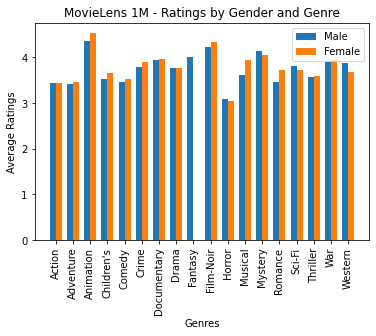

In [28]:
import matplotlib.pyplot as plt

# genre_names
male_counts = [ratings_mean[0][genre] for genre in unique_genres]
female_counts = [ratings_mean[1][genre] for genre in unique_genres]

x = np.arange(len(unique_genres))
width = 0.35

plt.figure()
fig, ax = plt.subplots()
ax.bar(x - width/2, male_counts, width, label='Male')
ax.bar(x + width/2, female_counts, width, label='Female')

ax.set_xlabel('Genres')
ax.set_ylabel('Average Ratings')
ax.set_title('MovieLens 1M - Ratings by Gender and Genre')
ax.set_xticks(x)
ax.set_xticklabels(genre_names)
plt.xticks(rotation=90)
ax.legend()
plt.show()

## Stats per age

In [43]:
Sx_age = np.load(root + "/age.npy").astype(int)
Sx_age

array([0, 2, 0, ..., 2, 1, 0])

In [44]:
age_value, age_count = np.unique(Sx_age, return_counts=True)
print(age_count)
print(age_count/np.sum(age_count))

[3421 1743  876]
[0.56639073 0.28857616 0.14503311]


In [45]:
age_ratings = {age : {int(genre): [] for genre in unique_genres} for age in [0, 1, 2]}

for i, age in enumerate(Sx_age):
    for j, genre in enumerate(genres):
        if matrix[i, j] != 0:
            age_ratings[age][genre].append(matrix[i, j])


In [47]:
age_ratings_mean = {age : {int(genre): 0 for genre in unique_genres} for age in [0, 1, 2]}

for age in age_ratings:
    for genre in age_ratings[age]:
        age_ratings_mean[age][genre] = np.mean(age_ratings[gender][genre])

<Figure size 432x288 with 0 Axes>

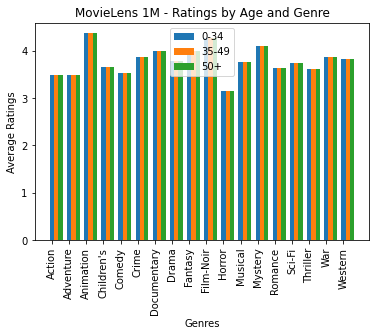

In [48]:
import matplotlib.pyplot as plt

# genre_names
young_counts = [age_ratings_mean[0][genre] for genre in unique_genres]
middle_counts = [age_ratings_mean[1][genre] for genre in unique_genres]
old_counts = [age_ratings_mean[2][genre] for genre in unique_genres]

x = np.arange(len(unique_genres))
width = 0.25
multiplier = 0

plt.figure()
fig, ax = plt.subplots()

offset = width * multiplier 
ax.bar(x + offset, young_counts, width, label='0-34')
multiplier += 1

offset = width * multiplier 
ax.bar(x + offset, middle_counts, width, label='35-49')
multiplier += 1

offset = width * multiplier 
ax.bar(x + offset, old_counts, width, label='50+')
multiplier += 1

ax.set_xlabel('Genres')
ax.set_ylabel('Average Ratings')
ax.set_title('MovieLens 1M - Ratings by Age and Genre')
ax.set_xticks(x)
ax.set_xticklabels(genre_names)
plt.xticks(rotation=90)
ax.legend()
plt.show()